In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cuisine-rating/Cuisine_rating.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'/kaggle/input/cuisine-rating/Cuisine_rating.csv')

In [4]:
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [5]:
df.describe()

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000
std,57.879185,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445
min,1.000000,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,50.750000,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000
50%,100.500000,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000
75%,150.250000,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,200.000000,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
df.info

<bound method DataFrame.info of      User ID  Area code            Location  Gender   YOB Marital Status  \
0          1        153  Upper East Side,NY  Female  2006         Single   
1          2        123       St. George,NY  Female  1991        Married   
2          3        122  Upper West Side,NY    Male  1977         Single   
3          4        153  Upper East Side,NY  Female  1956        Married   
4          5        129     Central Park,NY    Male  1997         Single   
..       ...        ...                 ...     ...   ...            ...   
195      196        175       St. George,NY  Female  1982         Single   
196      197        170  Upper West Side,NY  Female  2000        Married   
197      198        160       St. George,NY  Female  2006         Single   
198      199        130       St. George,NY    Male  2002        Married   
199      200        140  Upper East Side,NY    Male  2005        Married   

         Activity  Budget  Cuisines  Alcohol     Smoker

In [13]:
df.columns
df.dtypes

User ID             int64
Area code           int64
Location           object
Gender             object
YOB                 int64
Marital Status     object
Activity           object
Budget              int64
Cuisines           object
Alcohol            object
Smoker             object
Food Rating         int64
Service Rating      int64
Overall Rating    float64
Often A S          object
Age                 int64
dtype: object

In [47]:
df.rename(columns = {'Alcohol ':'Alcohol'}, inplace = True)

In [14]:
df['Age'] = 2025 - df['YOB']

Text(0.5, 1.0, 'Age Distribution')

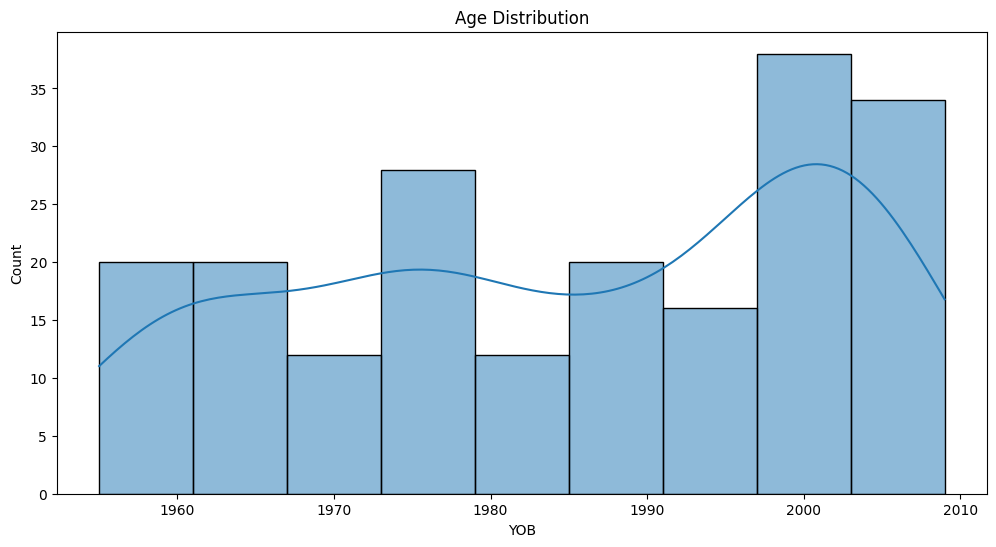

In [17]:
plt.figure(figsize = (12,6))
sns.histplot(x = df['YOB'], kde = True)
plt.title('Age Distribution')

In [24]:
print("Min Age:", df['Age'].min())
print("Max Age:", df['Age'].max())

Min Age: 16
Max Age: 70


In [25]:
df['Age_Group'] = pd.cut(df['Age'], bins = range(0,101,10), right = False)

<Axes: xlabel='Age_Group', ylabel='Overall Rating'>

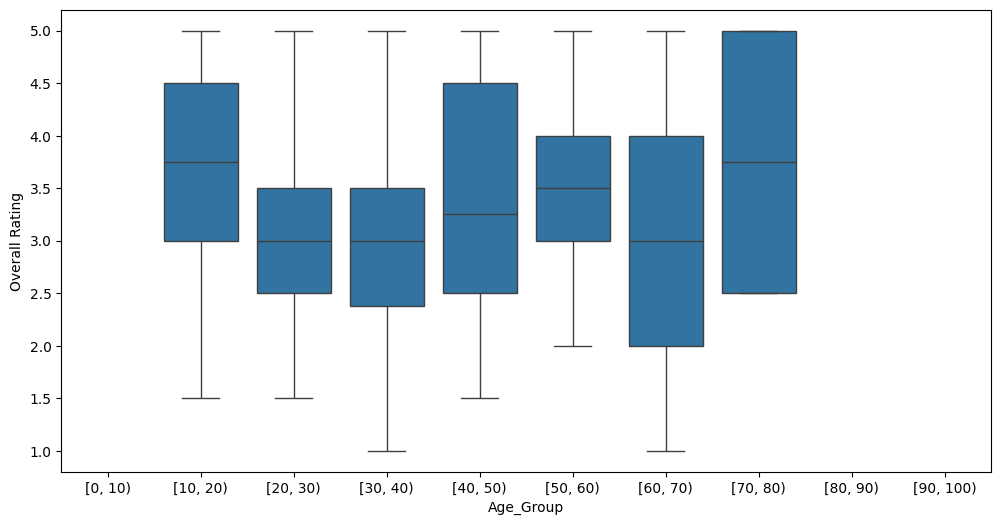

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age_Group', y='Overall Rating')

In [9]:
df['Location'].unique()

array(['Upper East Side,NY', 'St. George,NY', 'Upper West Side,NY',
       'Central Park,NY', 'China Town, NY', 'Riverdale,NY',
       'Market City, NY', 'Central Park,ny', 'Market City, MY',
       'Cedar Hill, NY'], dtype=object)

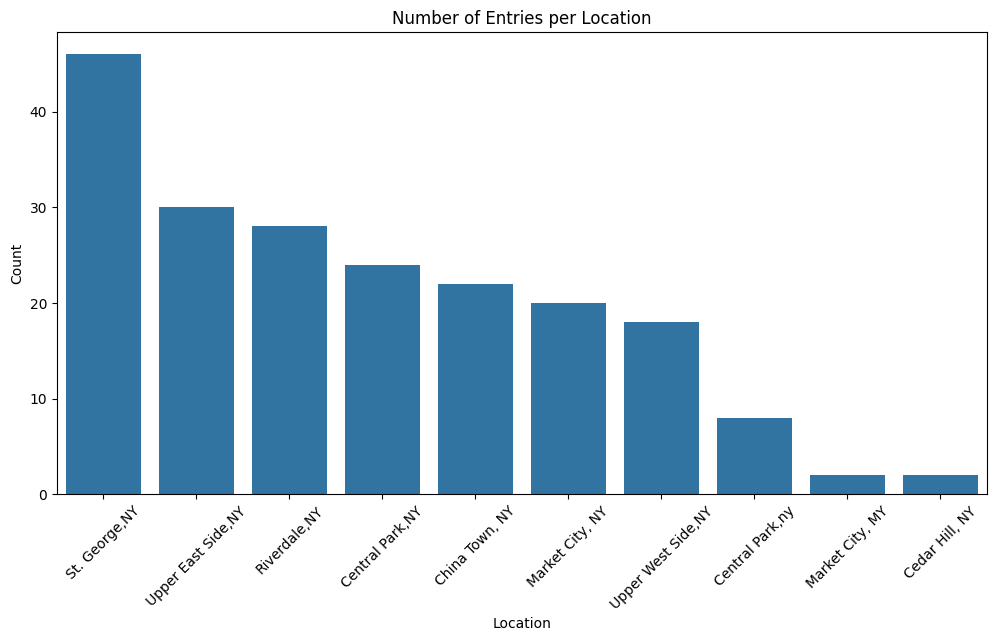

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Location', order=df['Location'].value_counts().index)

plt.title("Number of Entries per Location")
plt.xticks(rotation=45)  
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()


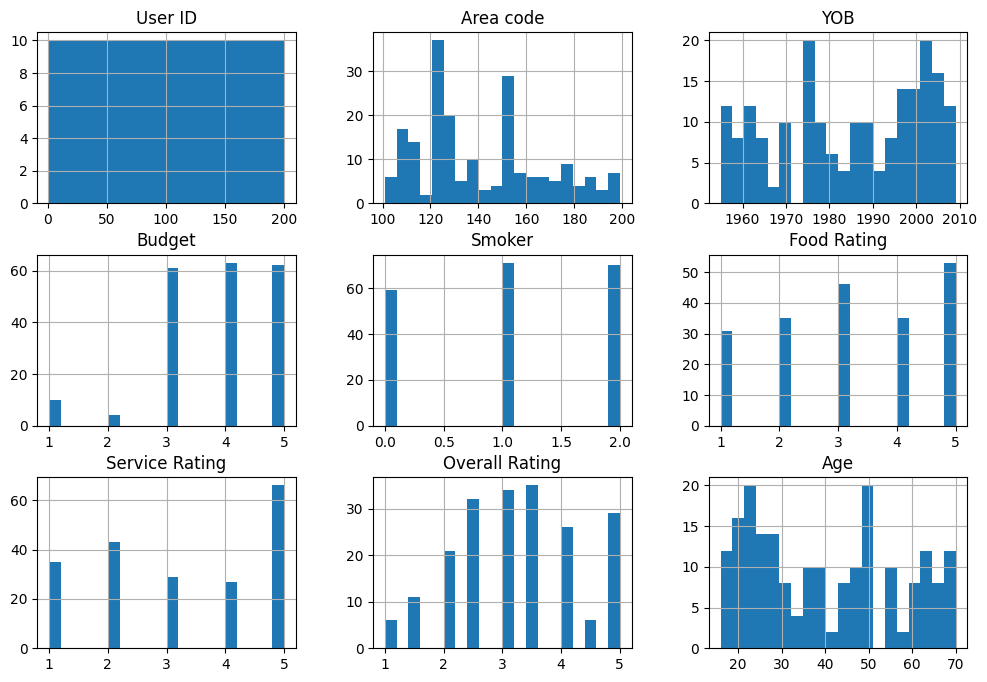

In [43]:
df.hist(figsize=(12, 8), bins=20)
plt.show()

In [49]:
df['Alcohol'].unique()

array(['Never', 'Often', 'Socially'], dtype=object)

In [53]:
Alcohol_Mapping = {'Never':0, 'Often': 1, 'Socially':2}
df['Alcohol'] = df['Alcohol'].map(Alcohol_Mapping)

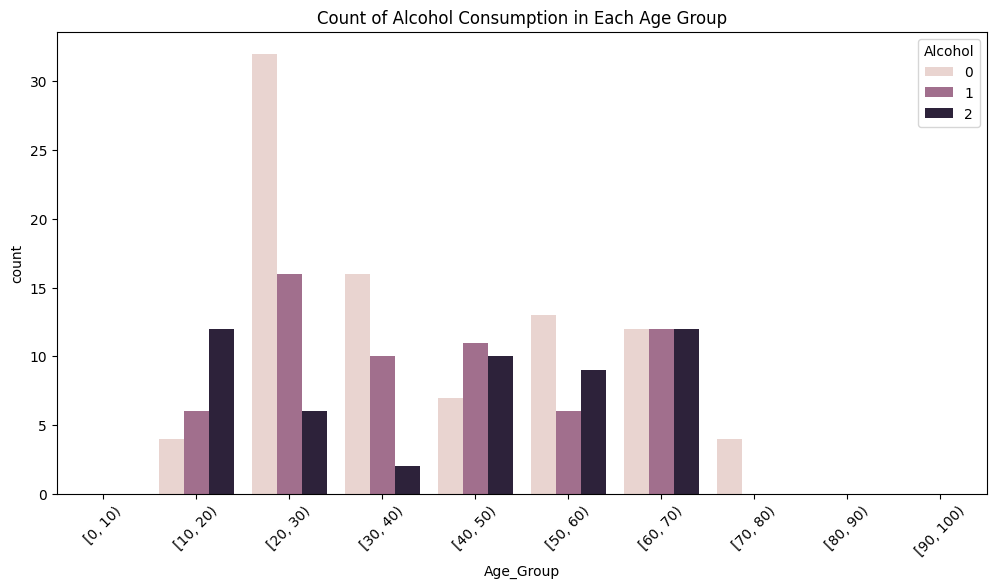

In [59]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Age_Group'], hue=df['Alcohol'])
plt.title("Count of Alcohol Consumption in Each Age Group")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Analysis of overall rating and age relationship')

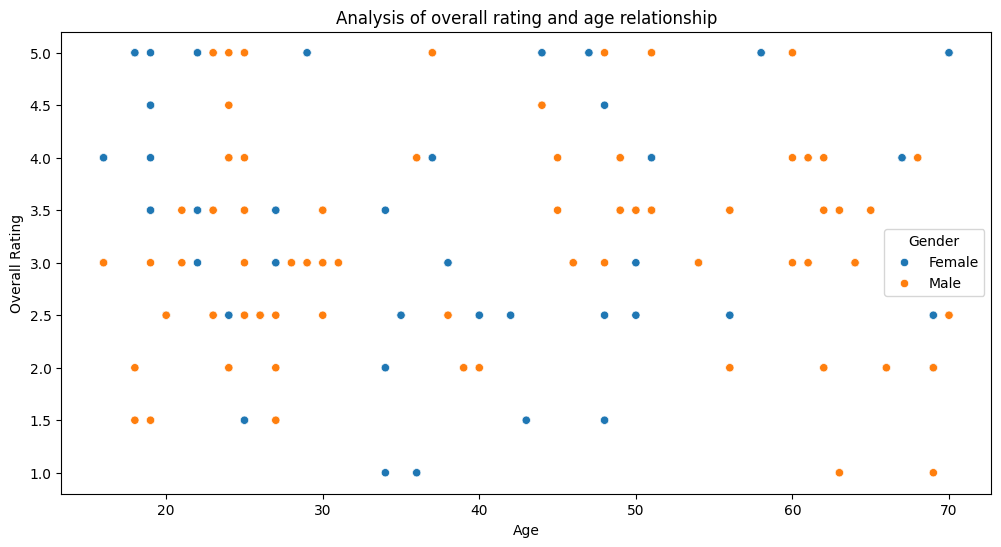

In [64]:
df['Age'] = 2025 - df['YOB']

df['Age_Group'] = pd.cut(df['Age'], bins=range(0, 101, 10), right=False)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Age', y='Overall Rating', hue='Gender')
plt.title('Analysis of overall rating and age relationship')

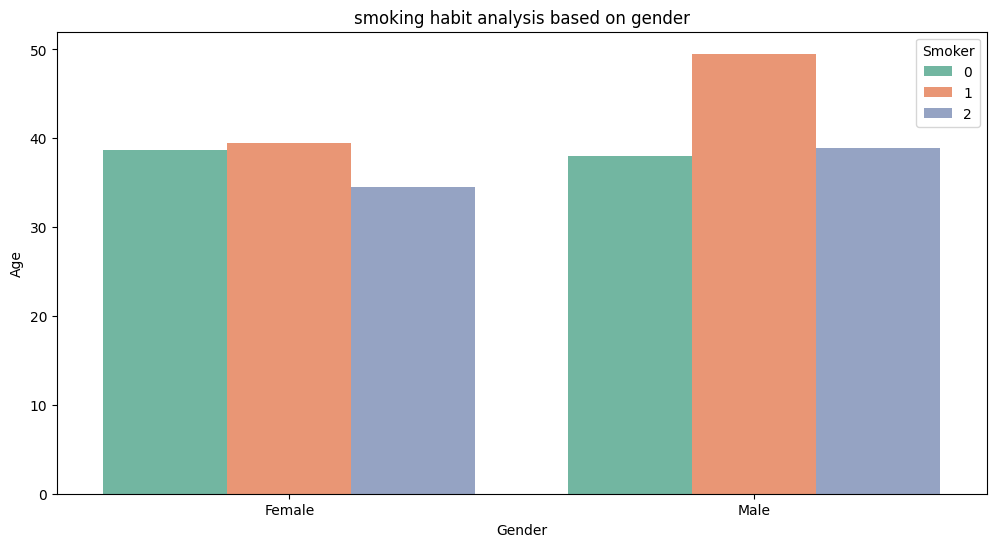

In [67]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Gender', y='Age', hue='Smoker', errorbar=None, palette='Set2')
plt.title('smoking habit analysis based on gender')
plt.show()